In [1]:
from dask.distributed import Client, LocalCluster

In [2]:
cluster = LocalCluster(n_workers=6, 
                       threads_per_worker=2,
                       memory_limit='2GB')

In [3]:
client = Client(cluster)

In [4]:
client

Client Scheduler: tcp://127.0.0.1:12487 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 6 Cores: 12 Memory: 12.00 GB


In [6]:
import pandas as pd 
import dask.dataframe as dd
import geopandas as gpd


In [7]:
data = dd.read_csv('E:Sample1.csv')

U can use filters to loc dataset by time

In [21]:

Tehshp1 = gpd.read_file('E:tehrn.shp')
Tehshp = Tehshp1.to_crs({'init': 'epsg:4326'})

C:\Users\Asus\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [22]:
def custom_join(df):
    
    shp1 = gpd.read_file('E:Arshad/Export_Output_6.shp') #send this for mr Rahmani
    shp = shp1.to_crs({'init': 'epsg:4326'})
    geodf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(x=df.Long, y=df.Lat), crs={'init': 'epsg:4326'})
    joined_data =gpd.sjoin(geodf, shp, how='left',op='within')
    joined_data = pd.DataFrame(joined_data)
    output = joined_data.groupby('index_right')['Id'].count().reset_index()
    
    return output


In [25]:
count_per_Grid = data.map_partitions(custom_join).compute()

C:\Users\Asus\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [28]:
shp['index_right']=range(0,1782)

In [29]:
Merged_shp = shp.merge(count_per_Grid,on='index_right',how='outer')

C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


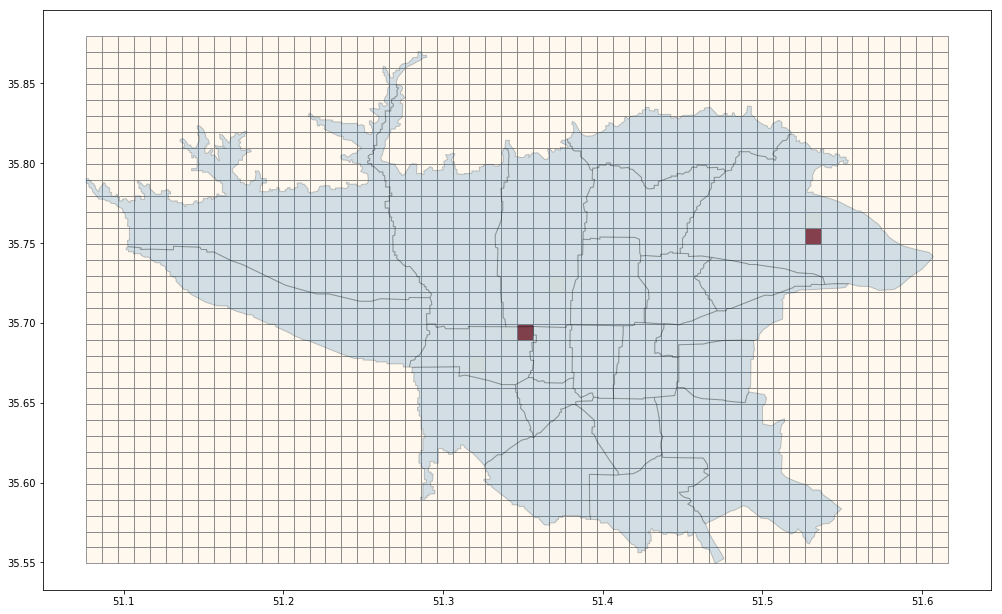

In [34]:
axis = Merged_shp.plot(figsize=(17,17), edgecolor="grey",cmap='OrRd',column='Id_y',alpha=0.8)
Tehshp.plot(ax=axis,alpha=.2,edgecolor="black")